In [1]:
import matplotlib.pyplot as plt
# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (6.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
%load_ext autoreload
%autoreload 2

In [11]:
opt = {'word_emb_dim': 300,
       'sentence_emb_dim': 400,
       'filter_num': 32,
       'dropout_rate': 0.5,
       'hidden_size': 256,
       'model_type': 'cnn',
       'num_layers': 1,
       'dataset_type': 'flickr8k',
       'cuda': False,
       'max_epoch': 1000,
       'savefreq': 10,
       'batch_size': 100,
       'learning_rate': 1e-2,
       'max_clip_norm': 5,
       }

In [16]:
from datautil import BatchDataWrapper
opt['train'] = True
dataset = BatchDataWrapper(opt)
print dataset

from torch.nn.utils.rnn import pad_packed_sequence

from gensim.models.word2vec import Word2Vec
model = Word2Vec.load('static/word2vec-chi/word2vec_news.model')
print model

Word2Vec(vocab=211954, size=300, alpha=0.025)


In [7]:
for word, score in model.most_similar(u'学校'):
    print word, score
print ''
for word, score in model.most_similar(u'建筑'):
    print word, score
print ''
for word, score in model.most_similar(u'商业'):
    print word, score

幼儿园 0.732428133488
中小学校 0.636097729206
中小学 0.633615255356
小学 0.632107615471
校 0.612632870674
班级 0.610821127892
民办学校 0.60665345192
学生 0.603830516338
高校 0.602926969528
本校 0.601496219635

建筑物 0.654039859772
建筑群 0.6348554492
古建筑 0.623602151871
民居 0.580152869225
建筑风格 0.573889791965
超高层 0.568300545216
高层建筑 0.558097243309
建筑设计 0.554647743702
外墙 0.545655488968
屋面 0.544338226318

商业中心 0.535054087639
商业地产 0.534810960293
业态 0.489878058434
商贸 0.485500603914
综合体 0.481251329184
商务 0.475296527147
金融 0.465207546949
高端 0.453738838434
服务业 0.450334191322
旺地 0.448338747025


count =  0
flag is  True
事务所为迪拜可持续发展城设计学校


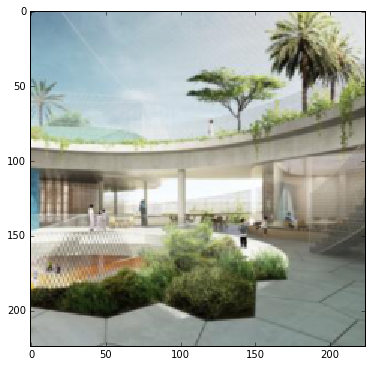

---------------------------------------------------------
count =  1
flag is  True
来看看大家都爱的的台湾物流办公室是什么样子的


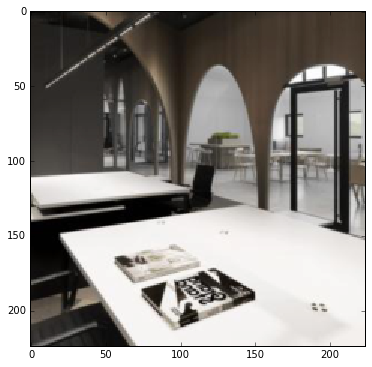

---------------------------------------------------------
count =  2
flag is  True
美国科罗拉多空军素质与领导力发展培养中心


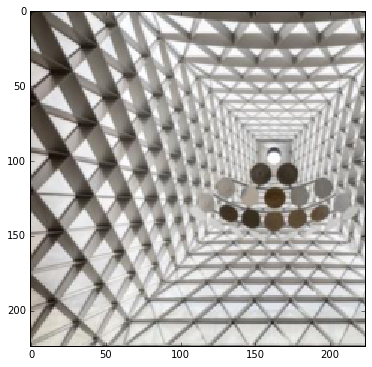

---------------------------------------------------------
count =  3
flag is  True
中国中铁售楼中心和社区图书馆／


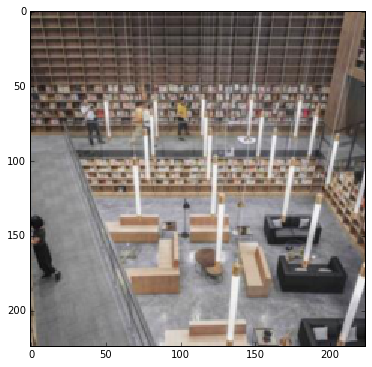

---------------------------------------------------------
count =  4
flag is  True
十年、十条媒体线索与一百名杰出的中国建筑师——北京国际设计周展览


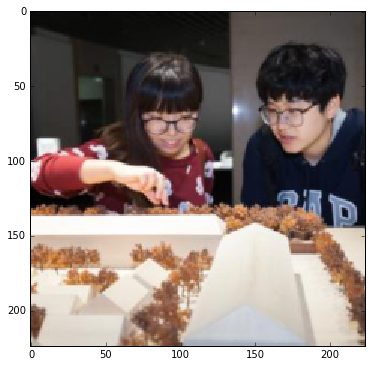

---------------------------------------------------------
count =  5
flag is  False
土耳其“活跃曲线”公司牛仔研发中心


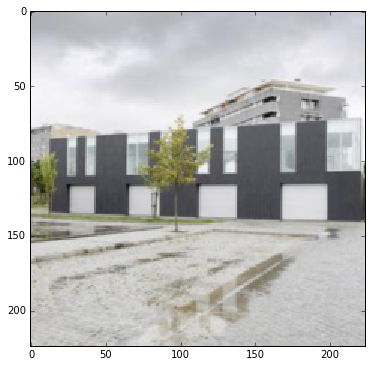

---------------------------------------------------------
count =  6
flag is  True
建筑事务所宣布中国南京麒麟科技创新园项目计划


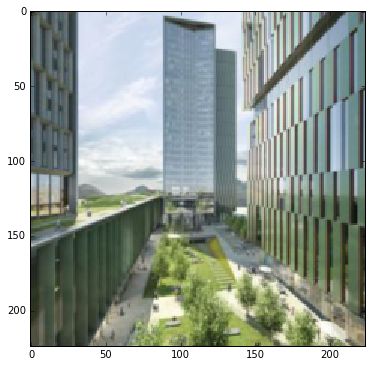

---------------------------------------------------------
count =  7
flag is  True
传承世代的家族居所展开疗愈的新生活展


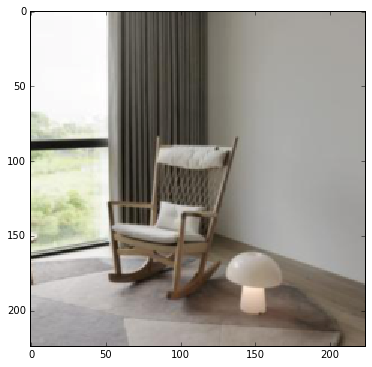

---------------------------------------------------------
count =  8
flag is  True
建筑事务所为设计了一面更注重联合性的墙


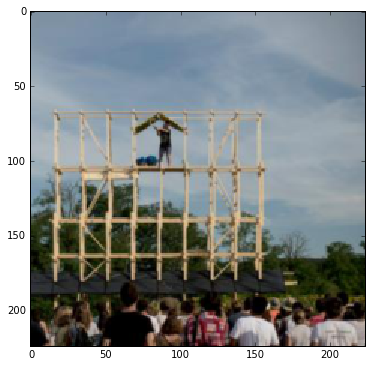

---------------------------------------------------------
count =  9
flag is  False
维多利亚大学——运动科学、体育分局和学习共享空间


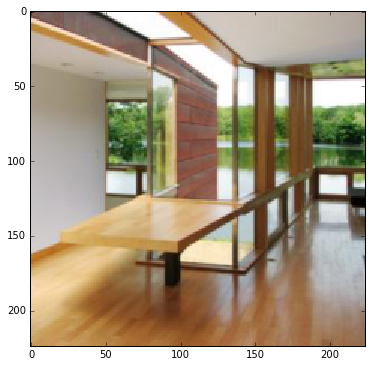

---------------------------------------------------------
count =  10
flag is  True
工作室关于莫斯科地铁站的建议：世界上最安静的地铁站


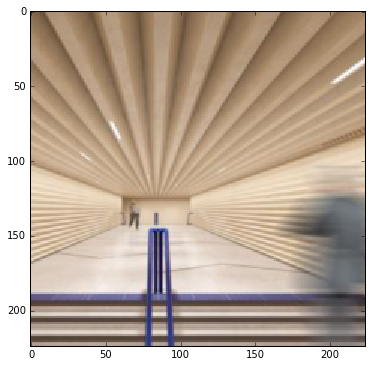

---------------------------------------------------------
count =  11
flag is  True
新舞台：上海船厂文化展示中心设计


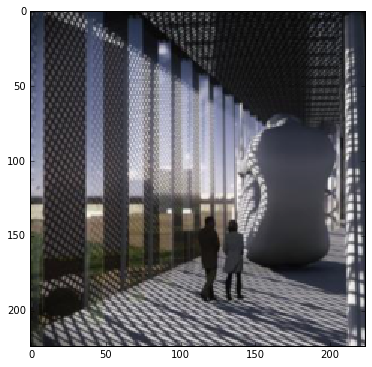

---------------------------------------------------------
count =  12
flag is  True
建筑事务所将把加拿大历史知名的邮局改造成数字图书馆


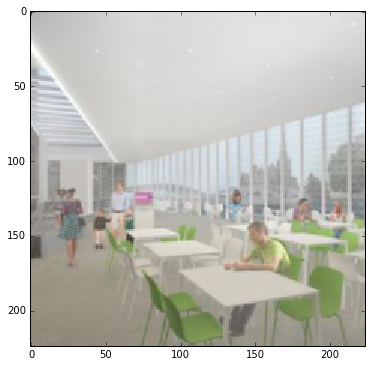

---------------------------------------------------------
count =  13
flag is  True
年度建筑奖获得者：为祖母建造的住宅


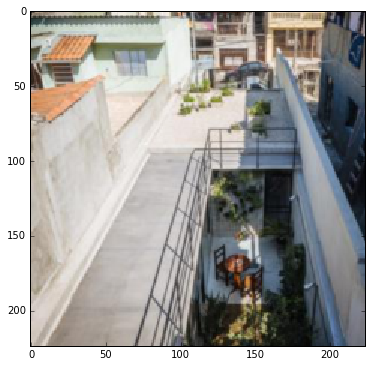

---------------------------------------------------------
count =  14
flag is  True
荷兰城堡的游客中心成为了历史的一部分


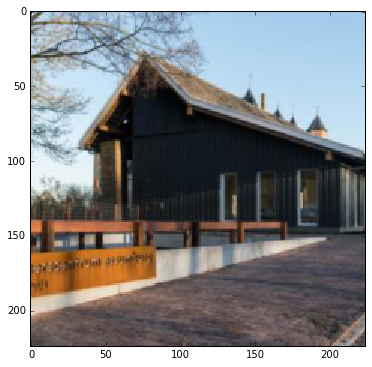

---------------------------------------------------------
count =  15
flag is  True
奥巴马总统图书馆在“第二故乡”设计大奖赛中的非官方获奖者


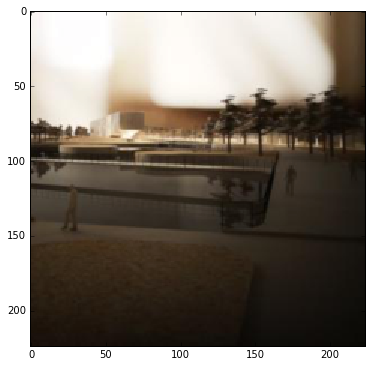

---------------------------------------------------------
count =  16
flag is  False
建筑事务所设计的吉达阿卜杜勒·拉蒂夫·贾米尔公司总部


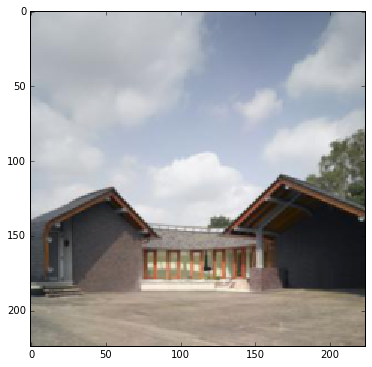

---------------------------------------------------------
count =  17
flag is  True
设计谢莱夫特奥文化中心大楼，将成为北欧地区最高的木结构建筑


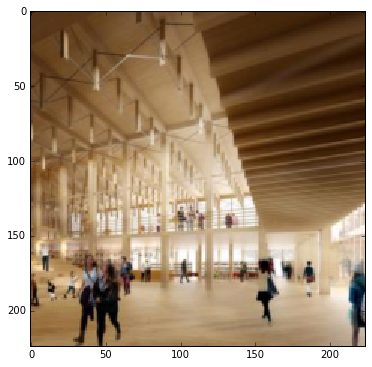

---------------------------------------------------------
count =  18
flag is  False
建筑事务所的方案对挪威历史谷仓进行保护，改建和重现


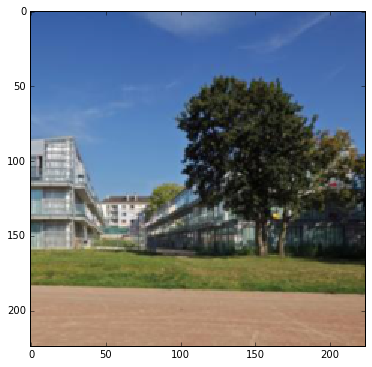

---------------------------------------------------------
count =  19
flag is  True
建筑事务所的方案对挪威历史谷仓进行保护，改建和重现


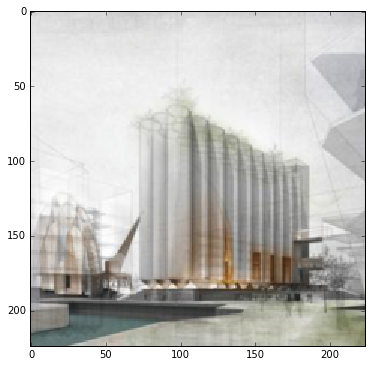

---------------------------------------------------------
count =  20


In [18]:
import numpy as np
count = 0
for sentences, images, flags in dataset.next_batch():
    words = sentences[0].data.numpy()
    print 'count = ', count
    count += 1
    if count > 20:
        break
    print 'flag is ', flags[0].data[0] == 1
    print ''.join([model.most_similar([w], topn=1)[0][0] for w in words])

    img = images[0].data.numpy()
    img2 = np.random.randn(224, 224, 3)
    img2[:, :, 0] = img[0, :, :] * 0.229 + 0.485
    img2[:, :, 1] = img[1, :, :] * 0.224 + 0.456
    img2[:, :, 2] = img[2, :, :] * 0.225 + 0.406
    plt.figure()
    plt.imshow(img2)
    plt.show()
    print '---------------------------------------------------------'

In [33]:
dataset.dataset.filename

Word2Vec(vocab=211954, size=300, alpha=0.025)


'data_pair_archgo_small.json'

In [12]:
count = 0
for sentences, images, flags in dataset.next_batch():
    print 'count = %d, batch size = %d' %(count, flags.size()[0])
    count += 1

count = 0, batch size = 10
count = 1, batch size = 10
count = 2, batch size = 10
count = 3, batch size = 10
count = 4, batch size = 10
count = 5, batch size = 10
count = 6, batch size = 10
count = 7, batch size = 10
count = 8, batch size = 10


In [30]:
import numpy as np
print np.random.choice(range(10), 10, replace=True)

import random
index = range(10)
print random.shuffle(index)
print index

[9 8 3 7 3 3 6 6 1 7]
None
[8, 1, 7, 3, 5, 2, 6, 4, 0, 9]
